In [1]:
import tensorflow as tf

In [8]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28,1)
training_images = training_images/255.0

val_images = val_images.reshape(10000, 28, 28, 1)
val_images = val_images/255.0


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
]
)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
             )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                32020     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [15]:
model.fit(training_images, training_labels, validation_data = (val_images,val_labels), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 141s 75ms/step - loss: 0.3237 - accuracy: 0.8817 - val_loss: 0.3403 - val_accuracy: 0.8810
Epoch 2/20
1875/1875 [==============================] - 131s 70ms/step - loss: 0.2808 - accuracy: 0.8976 - val_loss: 0.2980 - val_accuracy: 0.8891
Epoch 3/20
1875/1875 [==============================] - 131s 70ms/step - loss: 0.2507 - accuracy: 0.9087 - val_loss: 0.2827 - val_accuracy: 0.8964
Epoch 4/20
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2283 - accuracy: 0.9165 - val_loss: 0.2814 - val_accuracy: 0.8994
Epoch 5/20
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2098 - accuracy: 0.9227 - val_loss: 0.2734 - val_accuracy: 0.8988
Epoch 6/20
1875/1875 [==============================] - 126s 67ms/step - loss: 0.1957 - accuracy: 0.9280 - val_loss: 0.2658 - val_accuracy: 0.9026
Epoch 7/20
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1810 - accuracy: 0.9338 - val_loss: 0

In [16]:
print(val_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [17]:
import matplotlib.pyplot as plt

In [18]:
def show_image(img):
    plt.grid('False')
    plt.figure()
    plt.imshow(val_images[img].reshape(28,28))
    plt.show()

In [20]:
#I try to look at the process for images that has similar label. Which are 2,3 and 5. all of them have label 1
FIRST_IMAGE = 2
SECOND_IMAGE = 3
THIRD_IMAGE = 5

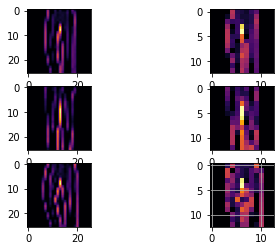

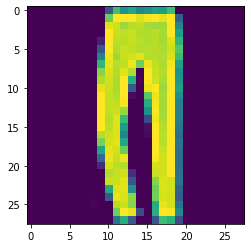

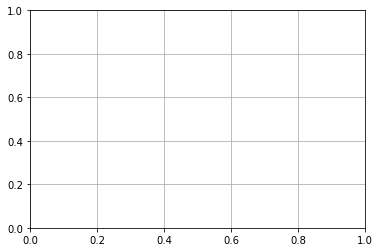

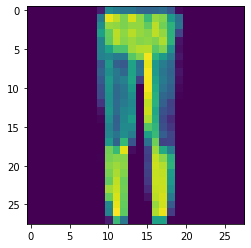

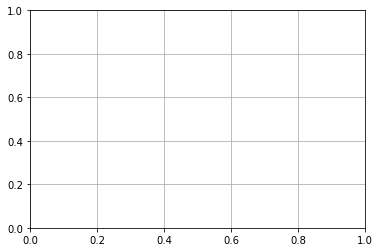

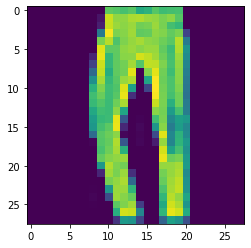

In [27]:
f,axarr = plt.subplots(3,2)
CONVOLUTION_NUMBER =1
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,2):
    f1 = activation_model.predict(val_images[FIRST_IMAGE].reshape(1, 28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(val_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(val_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, :,:, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

show_image(FIRST_IMAGE)
show_image(SECOND_IMAGE)
show_image(THIRD_IMAGE)